### Running R in Jupyter notebook
To run R commands in a Jupyter notebook, you need to install the R kernel for Jupyter. From the terminal (not RStudio or R GUI), launch R (type R and press <return>), and run the following commands:
```r
install.packages('devtools')
devtools::install_github('IRkernel/IRkernel')
# If using R 3.5, run
IRkernel::installspec(name = 'ir35', displayname = 'R 3.5')
# otherwise, change 3.5 to the version of R that is installed on your computer
```

### IRanges
The `IRanges` package provides an efficient infrastructure for manipulating intervals/ranges of integers. This package is available on Bioconductor:  
https://bioconductor.org/packages/release/bioc/html/IRanges.html

To install this package, start R and enter:

```r
if (!requireNamespace("BiocManager", quietly = TRUE))  
    install.packages("BiocManager")  
BiocManager::install("IRanges", version = "3.8")
```

In [1]:
# Load the IRanges package 
suppressMessages(library(IRanges))

`IRanges` are simple intervals that are defined by three parameters:
- start
- end
- width

To create an `IRanges` object, specify at least two of the above three parameters.

In [2]:
# Construct IRanges by specifying the start and width of each interval
ir = IRanges(start=c( 1,  5,  8, 25),
             width=c(10, 11, 13,  6))
ir

IRanges object with 4 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1        10        10
  [2]         5        15        11
  [3]         8        20        13
  [4]        25        30         6

In [3]:
# Construct IRanges by specifying the start and the end of each interval
ir2 = IRanges(start=1:3, end=10)
ir2

IRanges object with 3 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1        10        10
  [2]         2        10         9
  [3]         3        10         8

In [4]:
ir3 = IRanges(end=10, width=10:8)
ir3

IRanges object with 3 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1        10        10
  [2]         2        10         9
  [3]         3        10         8

The properties of the intervals can be accessed using the `start()`, `end()` and `width()` methods.

In [5]:
# Example IRanges
ir

IRanges object with 4 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1        10        10
  [2]         5        15        11
  [3]         8        20        13
  [4]        25        30         6

In [6]:
# Get the start positions of all ranges
start(ir)

[1]  1  5  8 25

In [7]:
# Get the end positions of all ranges
end(ir)

[1] 10 15 20 30

In [8]:
# Get the widths of all ranges
width(ir)

[1] 10 11 13  6

In order to illustrate range operations, we’ll create a function to plot ranges.

In [9]:
plotRanges = function(x, xlim=x, main=deparse(substitute(x)), col="gray", sep=0.5, ...){
  height = 1
  if (is(xlim, "IntegerRanges")) 
    xlim = c(min(start(xlim)), max(end(xlim)))
  bins = disjointBins(IRanges(start(x), end(x) + 1))
  plot.new()
  plot.window(xlim, c(0, max(bins)*(height + sep)))
  ybottom = bins * (sep + height) - height
  rect(start(x)-0.5, ybottom, end(x)+0.5, ybottom + height, col=col, ...)
  title(main)
  axis(1)
}
    
# Change plot size to 4in x 2.5in
library(repr)
options(repr.plot.width=4, repr.plot.height=2.5)

IRanges object with 4 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1        10        10
  [2]         5        15        11
  [3]         8        20        13
  [4]        25        30         6

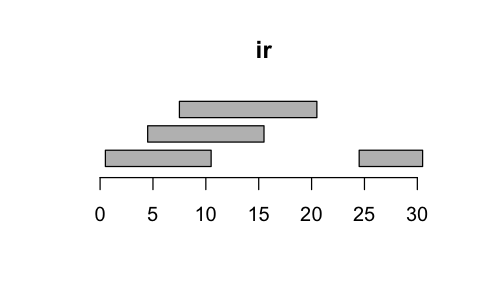

In [10]:
# Print IRanges and plot the corresponding intervals
ir
plotRanges(ir)

### Operations with IRanges
There are many operations that can be applied to IRanges (see https://bioconductor.org/packages/release/bioc/vignettes/IRanges/inst/doc/IRangesOverview.pdf). The operations that are most useful for us are explained below.

In [11]:
# Merging redundant ranges

# The function reduce() merges all IRanges into non-overlapping intervals
reduce(ir)

IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1        20        20
  [2]        25        30         6

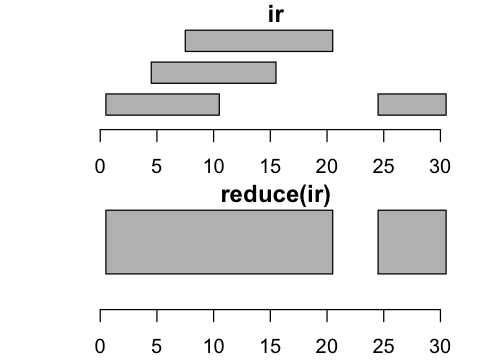

In [12]:
# Plot the result of reduce()
options(repr.plot.width=4, repr.plot.height=3)
par(mfrow=c(2,1), mar=c(2, 4, 1, 1) + 0.1)
plotRanges(ir)
plotRanges(reduce(ir))

In [13]:
# Counting overlapping ranges 
# (i.e. computing the coverage/occupancy of all ranges)

# The function coverage() counts the number of ranges over each position.
cov = coverage(ir)
cov

integer-Rle of length 30 with 7 runs
  Lengths: 4 3 3 5 5 4 6
  Values : 1 2 3 2 1 0 1

**Note:** The coverage is stored using the run-length encoding (Rle) format.  
One can convert this into an ordinary R vector using the `as.vector()` function.

In [14]:
as.vector(cov)

[1] 1 1 1 1 2 2 2 3 3 3 2 2 2 2 2 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1

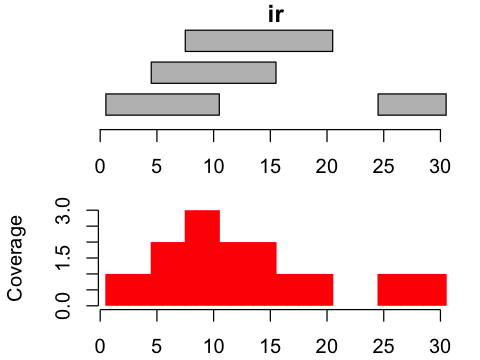

In [15]:
# Plot the result of coverage()
options(repr.plot.width=4, repr.plot.height=3)
par(mfrow=c(2,1), mar=c(2, 4, 1, 1) + 0.1)
plotRanges(ir)
cov = as.vector(cov)
plot(seq(1:length(cov)), cov, type='h', col="red", lwd=10, lend=1,
     xlab="Position", ylab="Coverage", bty="n")

In [16]:
# Resizing

# Example IRanges
ir = IRanges(start=c(1, 5, 9), width=3)
ir

IRanges object with 3 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         3         3
  [2]         5         7         3
  [3]         9        11         3

In [17]:
# We can resize the ranges to have a new width, by keeping fix the start, 
# end, or center of the original intervals

# Resize to width 1, keeping the left end fixed
resize(ir, width=1, fix="start")

IRanges object with 3 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         1         1
  [2]         5         5         1
  [3]         9         9         1

In [18]:
# Resize to width 1, keeping the right end fixed
resize(ir, width=1, fix="end")

IRanges object with 3 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         3         3         1
  [2]         7         7         1
  [3]        11        11         1

In [19]:
# Resize to width 1, keeping the center fixed
resize(ir, width=1, fix="center")

IRanges object with 3 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         2         2         1
  [2]         6         6         1
  [3]        10        10         1

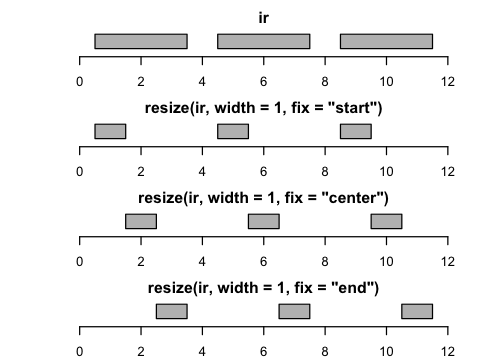

In [20]:
# Plot the results of the resize operations
options(repr.plot.width=4, repr.plot.height=3)
par(mfrow=c(4,1), mar=c(2, 4, 2, 1) + 0.1)
plotRanges(ir, xlim=c(0,12))
plotRanges(resize(ir, width=1, fix="start"), xlim=c(0,12))
plotRanges(resize(ir, width=1, fix="center"), xlim=c(0,12))
plotRanges(resize(ir, width=1, fix="end"), xlim=c(0,12))

More info on `IRanges`:
https://bioconductor.org/packages/release/bioc/vignettes/IRanges/inst/doc/IRangesOverview.pdf

### GRanges
The `GenomicRanges` package provides the `GRanges` class that allows manipulation of genomic ranges.  
https://bioconductor.org/packages/release/bioc/html/GenomicRanges.html

To install this package, run the following commands in R:

```r
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("GenomicRanges", version = "3.8")
```

In [21]:
# Load the GenomicRanges package
suppressMessages(library(GenomicRanges))

The `GRanges` class represents a collection of genomic ranges. Each genomic range is characterized by a chromosome name, a start and end location, and a strand. This class can be used to store the location of genomic features such as genes, transcripts, and binding sites. Genomic ranges can be created by using the `GRanges` constructor.

In [22]:
# Construct a GRanges object
gr = GRanges(
    seqnames = c("chr1", "chr2", "chr3"),
    ranges = IRanges(start = c(1, 3, 5), width = 5),
    strand = c("+", "-", "+"))
gr

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-5      +
  [2]     chr2       3-7      -
  [3]     chr3       5-9      +
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

In [23]:
# Occupancy of GRanges is computed using the coverage() method
cov = coverage(gr)
cov

RleList of length 3
$chr1
integer-Rle of length 5 with 1 run
  Lengths: 5
  Values : 1

$chr2
integer-Rle of length 7 with 2 runs
  Lengths: 2 5
  Values : 0 1

$chr3
integer-Rle of length 9 with 2 runs
  Lengths: 4 5
  Values : 0 1


In [24]:
# Show coverage of chr3 as a normal vector
as.vector(cov$chr3)

[1] 0 0 0 0 1 1 1 1 1

In [25]:
# GRanges can also be resized
# Resize to width 1 and keep the center fixed
gr
resize(gr, width=1, fix="center")

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-5      +
  [2]     chr2       3-7      -
  [3]     chr3       5-9      +
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1         3      +
  [2]     chr2         5      -
  [3]     chr3         7      +
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

In [26]:
# When we resize the GRanges and keep the "start" fixed 
# we observe something interesting
gr
resize(gr, width=1, fix="start")

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-5      +
  [2]     chr2       3-7      -
  [3]     chr3       5-9      +
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1         1      +
  [2]     chr2         7      -
  [3]     chr3         5      +
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

When resizing `GRanges`, fix="start" indicates that the 5' end of the interval will remain fixed (not necessarily the left end).

In [27]:
# Similarly, we can keep the 3' end fixed, by using the option fix="end"
gr
resize(gr, width=1, fix="end")

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-5      +
  [2]     chr2       3-7      -
  [3]     chr3       5-9      +
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1         5      +
  [2]     chr2         3      -
  [3]     chr3         9      +
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

More info about `GRanges` can be found here: https://bioconductor.org/packages/release/bioc/vignettes/GenomicRanges/inst/doc/GenomicRangesIntroduction.html

Next we will use `GRanges` to illustrate the typical steps in a basic analysis of MNase-seq data.

### MNase-seq data analysis
For this we will use a few extra R packages. To install the necessary R packages, run the following commands in R:
```r
# To install the required Bioconductor packages, run:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(
    c("genomation", "Gviz", "GenomicFeatures", "Rsamtools", "rtracklayer"))

# To install other packages used in this workshop, run:
install.packages("ggplot2")
install.packages("pryr")
install.packages("RMariaDB")
```

In [28]:
# Load the necessary packages
suppressMessages({
    library(genomation)
    library(Gviz)
    library(GenomicFeatures)
    library(Rsamtools)
    library(rtracklayer)
    library(ggplot2)
    library(pryr)
})

First, we need to read the aligned reads from a `bam` file.

In [29]:
# List all bam files from our bam folder
all_bam_files = list.files("bam_files/", pattern = ".bam$", full.names = TRUE)
print(all_bam_files)

[1] "bam_files//SRR3649298.sorted.bam" "bam_files//test.bam"             
[3] "bam_files//test.sorted.bam"      


In [30]:
# Load one of the bam files
bam_file = Rsamtools::BamFile('bam_files/SRR3649298.sorted.bam')

In [31]:
# Fields that are stored and can be imported from a bam file: 
scanBamWhat()

[1] "qname"       "flag"        "rname"       "strand"      "pos"        
 [6] "qwidth"      "mapq"        "cigar"       "mrnm"        "mpos"       
[11] "isize"       "seq"         "qual"        "groupid"     "mate_status"

For now we will only need the following info:
   - qname - read (query) name
   - rname - reference (chromosome) name 
   - strand
   - pos   - start position of the read
   - isize - full length of the paired-end read

In [32]:
# Import selected fields from the bam file
fields_to_load = c("qname", "rname", "strand", "pos", "isize")
param = ScanBamParam(what = fields_to_load)
aln = scanBam(bam_file, param = param)

In [33]:
# Check the structure of the aln object
str(aln)

List of 1
 $ :List of 5
  ..$ qname : chr [1:20736288] "SRR3649298.4581098" "SRR3649298.4402766" "SRR3649298.8910767" "SRR3649298.6870098" ...
  ..$ rname : Factor w/ 17 levels "chrI","chrII",..: 1 1 1 1 1 1 1 1 1 1 ...
  ..$ strand: Factor w/ 3 levels "+","-","*": 1 1 1 1 1 1 2 1 1 1 ...
  ..$ pos   : int [1:20736288] 2 4 4 6 6 7 11 12 13 13 ...
  ..$ isize : int [1:20736288] 61 59 57 57 57 75 -57 56 66 66 ...


In [34]:
# Let's subset the first element (all the information is in there)
aln = aln[[1]]

In [35]:
# Get the total number of reads
length(aln$qname)

[1] 20736288

There are about 20 million reads, corresponding to about 10 million pairs (paired-end reads).

In [36]:
# Construct GRanges from the paired-end reads
read_on_Watson_strand = (aln$strand == '+') & (aln$isize > 0)

reads = GRanges(seqnames = Rle(aln$rname[read_on_Watson_strand]),
                ranges = IRanges(start = aln$pos[read_on_Watson_strand],
                                 width = aln$isize[read_on_Watson_strand]))

reads

GRanges object with 10340584 ranges and 0 metadata columns:
             seqnames        ranges strand
                <Rle>     <IRanges>  <Rle>
         [1]     chrI          2-62      *
         [2]     chrI          4-62      *
         [3]     chrI          4-60      *
         [4]     chrI          6-62      *
         [5]     chrI          6-62      *
         ...      ...           ...    ...
  [10340580]   chrXVI 947931-947997      *
  [10340581]   chrXVI 947969-948033      *
  [10340582]   chrXVI 947979-948062      *
  [10340583]   chrXVI 947989-948039      *
  [10340584]   chrXVI 948006-948060      *
  -------
  seqinfo: 17 sequences from an unspecified genome; no seqlengths

In [37]:
# Check the size of memory that are occupied by aln and reads objects
pryr::object_size(aln)
pryr::object_size(reads)

1.33 GB

82.7 MB

The `aln` object occupies 2.7 GB of memory, while the `GRanges` occupy only 168 MB. To free some memory, the `aln` object can be removed now.

In [38]:
# Remove aln from memory
rm(aln)

In [39]:
# Check the number of paired-end reads that were mapped to each chromosome
no_of_reads = table(seqnames(reads))
no_of_reads


   chrI   chrII  chrIII   chrIV   chrIX    chrM    chrV   chrVI  chrVII chrVIII 
 176486  619123  241879 1175642  349356    9790  449570  212569  836807  445682 
   chrX   chrXI  chrXII chrXIII  chrXIV   chrXV  chrXVI 
 590686  512675 1839424  724905  585225  843454  727311 

In [40]:
# Get the chromosome lengths
chr_lengths = seqlengths(seqinfo(bam_file))
chr_lengths

chrI   chrII  chrIII   chrIV   chrIX    chrM    chrV   chrVI  chrVII chrVIII 
 230218  813184  316620 1531933  439888   85779  576874  270161 1090940  562643 
   chrX   chrXI  chrXII chrXIII  chrXIV   chrXV  chrXVI 
 745751  666816 1078177  924431  784333 1091291  948066

In [41]:
# Compute the sequencing depth (number of reads / chromosome)
no_of_reads_per_bp = no_of_reads / chr_lengths
no_of_reads_per_bp


     chrI     chrII    chrIII     chrIV     chrIX      chrM      chrV     chrVI 
0.7666038 0.7613566 0.7639410 0.7674239 0.7941931 0.1141305 0.7793210 0.7868234 
   chrVII   chrVIII      chrX     chrXI    chrXII   chrXIII    chrXIV     chrXV 
0.7670514 0.7921222 0.7920687 0.7688403 1.7060501 0.7841634 0.7461435 0.7728956 
   chrXVI 
0.7671523 

There's a slight variability in the sequencing depth per chromosome, and this is why I prefer to normalize the coverage profiles per chromosome (more about this later).  

Chromosome 12 (chrXII) has a much higher sequencing depth though, because of the rDNA region, which we will mask later.

The mitochondrial DNA (chrM) has a much lower sequencing depth, but we don't care about chrM, which we will discard from the analysis anyway. 


In [42]:
# The name of all chromosomes can be obtained using seqlevels()
seqlevels(reads)

[1] "chrI"    "chrII"   "chrIII"  "chrIV"   "chrIX"   "chrM"    "chrV"   
 [8] "chrVI"   "chrVII"  "chrVIII" "chrX"    "chrXI"   "chrXII"  "chrXIII"
[15] "chrXIV"  "chrXV"   "chrXVI"

In [43]:
# Remove chrM
reads = dropSeqlevels(reads, "chrM", pruning.mode="coarse")
seqlevels(reads)

[1] "chrI"    "chrII"   "chrIII"  "chrIV"   "chrIX"   "chrV"    "chrVI"  
 [8] "chrVII"  "chrVIII" "chrX"    "chrXI"   "chrXII"  "chrXIII" "chrXIV" 
[15] "chrXV"   "chrXVI"

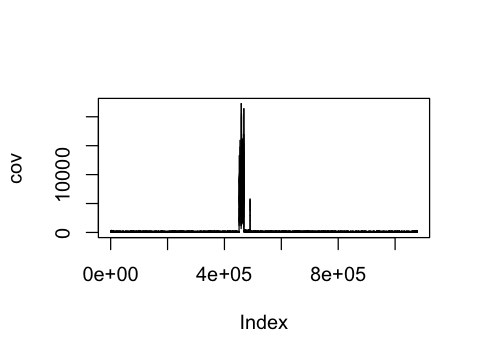

In [44]:
# Check the problem with chrXII

# Compute the coverage on chrXII
cov = coverage(reads)$chrXII

plot(cov, type='l')

In [45]:
# Get a few quantiles for the coverage of chrXII
quantile(cov, probs = c(0.95, 0.96, 0.97, 0.98, 0.99))

95%  96%  97%  98%  99% 
 212  224  249  330 6772

In [46]:
# Let's see which regions have a coverage higher than 1000
slice(cov, lower=1000, rangesOnly=TRUE)

IRanges object with 4 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]    451434    458717      7284
  [2]    458727    467854      9128
  [3]    467864    468929      1066
  [4]    489941    490421       481

In [47]:
# Create a GRanges object that contains all the problematic regions
# Discard the reads from the rDNA region
bad_regions = GRanges(seqnames = "chrXII",
                      ranges = IRanges(start = c(451000, 489000),
                                       end   = c(469000, 491000)))
bad_read_ind = overlapsAny(reads, bad_regions, ignore.strand=TRUE)
reads = reads[!bad_read_ind]

In [48]:
# Check the number of paired-end reads that were mapped to each chromosome,
# after removing the rDNA reads
no_of_reads = table(seqnames(reads))
chr_lengths = chr_lengths[seqlevels(reads)]
no_of_reads_per_bp = no_of_reads / chr_lengths
no_of_reads_per_bp


     chrI     chrII    chrIII     chrIV     chrIX      chrV     chrVI    chrVII 
0.7666038 0.7613566 0.7639410 0.7674239 0.7941931 0.7793210 0.7868234 0.7670514 
  chrVIII      chrX     chrXI    chrXII   chrXIII    chrXIV     chrXV    chrXVI 
0.7921222 0.7920687 0.7688403 0.7760711 0.7841634 0.7461435 0.7728956 0.7671523 

After removing the mitochondrial DNA and the problematic regions of `chrXII`, the sequencing depth became much more even (between 0.746 and 0.794 reads per bp).

In [49]:
# Save the sequencing depth to a csv file
dir.create("results")
write.csv(data.frame(Chrom = names(no_of_reads_per_bp), 
                     Reads_per_bp = as.vector(no_of_reads_per_bp)),
          file = "results/Sequencing_depth.SRR3649298.csv",
          row.names = FALSE)

Next, we'll check the fragment length distribution.

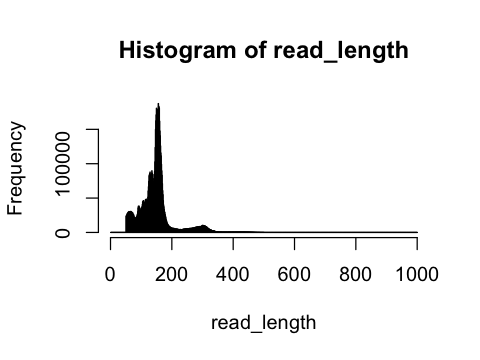

In [50]:
# Get read lengths. This is done easily using the width accessor (method) of GRanges 
read_length = width(reads)

# Plot a histogram of read lengths
h = hist(read_length, breaks = seq(from = 0.5, to = 1000.5, by = 1), plot = TRUE)

This plot shows the number of reads that have a given length. Since different samples have different total numbers of reads, it is more convenient to plot the percentage of reads for each length. We'll do this using `ggplot` to create a nicer figure.

Warning message:
"Removed 450 rows containing missing values (geom_path)."

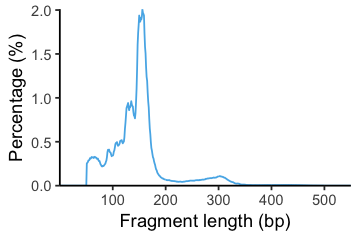

In [51]:
options(repr.plot.width=3, repr.plot.height=2)
df = data.frame(frag_length = h$mids, percentage_of_reads = 100*h$density)
p = ggplot(df, aes(x = frag_length, y = percentage_of_reads)) + 
  geom_line(colour="#56B4E9") +
  scale_x_continuous(limits = c(0, 550), expand = c(0, 0), 
                     breaks = seq(100, 500, 100)) +
  scale_y_continuous(expand = c(0, 0)) +
  theme_classic() +
  xlab("Fragment length (bp)") + 
  ylab("Percentage (%)")
p

In [52]:
# Save the histogram to a pdf file
ggsave(filename = "results/Length_histogram.SRR3649298.pdf", 
       plot = p, width = 4, height = 3, units = "in")

Warning message:
"Removed 450 rows containing missing values (geom_path)."

In [53]:
# Save the histogram to a csv file
write.csv(data.frame(Length = h$mids, Percentage = 100*h$density), 
          file = "results/Length_histogram.SRR3649298.csv", 
          row.names = FALSE)

Next, we will select the nucleosomal reads, with the length close to 150 bp (e.g. reads with the length between 120 bp and 180 bp), and we will analyze the distribution of the corresponding nucleosomes.

In [54]:
# Size selection
Lmin = 120
Lmax = 180
size_filter = ((read_length >= Lmin) & (read_length <= Lmax))
reads.120_180 = reads[size_filter]

In [55]:
# Compute the raw coverage of these reads
raw_occ = coverage(reads.120_180)

# Compute the average occupancy for each chromosome
chr_label = seqlevels(raw_occ)
for(chr in chr_label){
    cat(sprintf("Avg. occ. for %s is %0.3f\n", chr, mean(raw_occ[[chr]])))
}

Avg. occ. for chrI is 75.159
Avg. occ. for chrII is 72.887
Avg. occ. for chrIII is 73.846
Avg. occ. for chrIV is 73.132
Avg. occ. for chrIX is 77.208
Avg. occ. for chrV is 74.193
Avg. occ. for chrVI is 76.503
Avg. occ. for chrVII is 72.982
Avg. occ. for chrVIII is 75.884
Avg. occ. for chrX is 76.819
Avg. occ. for chrXI is 73.616
Avg. occ. for chrXII is 74.206
Avg. occ. for chrXIII is 75.107
Avg. occ. for chrXIV is 71.542
Avg. occ. for chrXV is 73.939
Avg. occ. for chrXVI is 73.067


In [56]:
# Get the normalization factor, 1 / avg(occ), for each chromosome
occ_norm_factor = list()
for(chr in chr_label){
    occ_norm_factor[[chr]] = 1/mean(raw_occ[[chr]])
}

In [57]:
# Compute the normalized occupancy (relative to chromosome average)
norm_occ = coverage(reads.120_180, weight = occ_norm_factor)

In [58]:
# Check the averages of the normalized occupancy for each chromosome
for(chr in chr_label){
    cat(sprintf("Avg. occ. for %s is %0.3f\n", chr, mean(norm_occ[[chr]])))
}

Avg. occ. for chrI is 1.000
Avg. occ. for chrII is 1.000
Avg. occ. for chrIII is 1.000
Avg. occ. for chrIV is 1.000
Avg. occ. for chrIX is 1.000
Avg. occ. for chrV is 1.000
Avg. occ. for chrVI is 1.000
Avg. occ. for chrVII is 1.000
Avg. occ. for chrVIII is 1.000
Avg. occ. for chrX is 1.000
Avg. occ. for chrXI is 1.000
Avg. occ. for chrXII is 1.000
Avg. occ. for chrXIII is 1.000
Avg. occ. for chrXIV is 1.000
Avg. occ. for chrXV is 1.000
Avg. occ. for chrXVI is 1.000


Similarly, we can compute the genome-wide distribution of the nucleosome dyads (centers of DNA fragments).

In [59]:
# Get the centers of all reads
dyad_pos.120_180 = resize(reads.120_180, width=1, fix="center")
head(dyad_pos.120_180)

GRanges object with 6 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chrI       124      *
  [2]     chrI       179      *
  [3]     chrI       161      *
  [4]     chrI       197      *
  [5]     chrI       186      *
  [6]     chrI       196      *
  -------
  seqinfo: 16 sequences from an unspecified genome; no seqlengths

In [60]:
# Stack all dyad positions to construct the raw distribution of dyads
raw_dyads = coverage(dyad_pos.120_180)

In [61]:
# Get the normalization factors for each chromosome
dyads_norm_factor = list()
for(chr in chr_label){
    dyads_norm_factor[[chr]] = 1/mean(raw_dyads[[chr]])
}

In [62]:
# Compute the normalized dyad distribution (relative to chromosome average)
norm_dyads = coverage(dyad_pos.120_180, weight = dyads_norm_factor)

In [63]:
# Check the averages of the normalized dyad distribution for each chromosome
for(chr in chr_label){
    cat(sprintf("Avg. dyad density for %s is %0.3f\n", chr, mean(norm_dyads[[chr]])))
}

Avg. dyad density for chrI is 1.000
Avg. dyad density for chrII is 1.000
Avg. dyad density for chrIII is 1.000
Avg. dyad density for chrIV is 1.000
Avg. dyad density for chrIX is 1.000
Avg. dyad density for chrV is 1.000
Avg. dyad density for chrVI is 1.000
Avg. dyad density for chrVII is 1.000
Avg. dyad density for chrVIII is 1.000
Avg. dyad density for chrX is 1.000
Avg. dyad density for chrXI is 1.000
Avg. dyad density for chrXII is 1.000
Avg. dyad density for chrXIII is 1.000
Avg. dyad density for chrXIV is 1.000
Avg. dyad density for chrXV is 1.000
Avg. dyad density for chrXVI is 1.000


In [64]:
# Save profiles to BigWig files
rtracklayer::export.bw(norm_occ, "results/Norm_occ.SRR3649298.120-180.bw")
rtracklayer::export.bw(norm_dyads, "results/Norm_dyads.SRR3649298.120-180.bw")

### Visualizations
Next we will visualize the nucleosome distribution in different ways. The BigWig files that we created can be loaded in the IGV browser (http://software.broadinstitute.org/software/igv/), but we can also visualize the data directly in R.

First, let's look at a single genomic locus. Let's look at the _ARG1_ gene (`chrXV:219,211-220,473`).

Download the sgdGene table ... OK
Download the sgdIsoforms table ... OK
Download the sgdCanonical table ... OK
Extract the 'transcripts' data frame ... OK
Extract the 'splicings' data frame ... OK
Download and preprocess the 'chrominfo' data frame ... OK
Prepare the 'metadata' data frame ... OK
Make the TxDb object ... OK


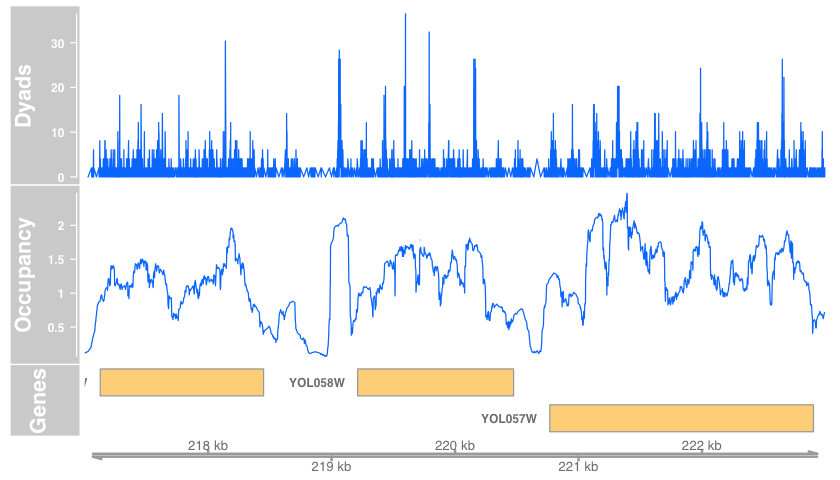

In [65]:
# Specify the range to plot
chr = "chrXV"
view_from = 217000
view_to = 223000

dyadsTrack = DataTrack(
    range = "results/Norm_dyads.SRR3649298.120-180.bw",
    type = "l",
    genome = "sacCer3",
    name = "Dyads"
)

occTrack = DataTrack(
    range = "results/Norm_occ.SRR3649298.120-180.bw",
    type = "l",
    genome = "sacCer3",
    name = "Occupancy"
)

# Gene annotation track
txdb = makeTxDbFromUCSC(genome="sacCer3", tablename = "sgdGene")
genesTrack = GeneRegionTrack(txdb, name="Genes", showId=TRUE)

# Genomic coordinate track
coordTrack = GenomeAxisTrack()

options(repr.plot.width=7, repr.plot.height=4)
plotTracks(
    list(dyadsTrack, occTrack, genesTrack, coordTrack),
    chromosome = "chrXV", 
    from = view_from, to = view_to
)

In [66]:
# Save figure to a pdf file
pdf("results/Nuc_distribution.ARG1.pdf")
plotTracks(
    list(dyadsTrack, occTrack, genesTrack, coordTrack),
    chromosome = "chrXV", 
    from = view_from, to = view_to
)
dev.off()

pdf 
  2